In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
df.drop(["loan_id"],axis=1,inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 12)

In [6]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [7]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [8]:
df[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [10]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [11]:
df[" education"]=df[" education"].replace({' Not Graduate':0,' Graduate':1})
df[' self_employed']=df[' self_employed'].replace({' No':0, ' Yes':1})
df[" loan_status"]=df[" loan_status"].replace({' Approved':1, ' Rejected':0})

C:\Users\USER\AppData\Local\Temp\ipykernel_15036\3915458836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[" education"]=df[" education"].replace({' Not Graduate':0,' Graduate':1})
C:\Users\USER\AppData\Local\Temp\ipykernel_15036\3915458836.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[' self_employed']=df[' self_employed'].replace({' No':0, ' Yes':1})
C:\Users\USER\AppData\Local\Temp\ipykernel_15036\3915458836.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

In [12]:
df.sample(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4166,1,1,0,500000,1300000,14,619,1500000,100000,2000000,500000,1
2060,1,1,1,4400000,12300000,6,583,2400000,7900000,17200000,6600000,1
1070,2,0,1,2800000,10100000,16,531,2900000,2900000,7200000,4100000,0


In [13]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [14]:
x=df.drop(" loan_status",axis=1)
y=df[" loan_status"]

In [15]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)

In [17]:
x_train.shape,x_test.shape

((3415, 11), (854, 11))

In [18]:
x_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2610,-0.883825,0.995559,0.992765,0.263985,-0.235941,0.192617,1.520003,0.588568,0.780878,-0.343449,-0.331310
2789,0.295621,0.995559,-1.007288,0.549036,0.781499,0.192617,0.922590,0.219500,-0.631921,0.392598,1.084160
324,-0.294102,-1.004461,-1.007288,0.228353,0.140069,0.192617,0.626784,-0.580146,-0.950940,-0.013876,-0.177454
3803,-1.473548,0.995559,0.992765,1.546716,2.318718,-0.157737,0.087373,2.110972,-0.267328,1.348359,1.268786
1589,-0.883825,0.995559,0.992765,-1.481955,-1.485623,1.243677,-0.788446,-0.949213,-1.133237,-1.453011,-1.315984


In [19]:
x_test.head(7)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3485,0.295621,-1.004461,-1.007288,-1.018747,-0.755720,1.243677,-1.658464,-0.979969,-0.928153,-1.024566,-0.915960
3281,0.295621,0.995559,0.992765,-0.270487,0.162188,-0.157737,-0.167833,-0.272590,-0.290115,-0.255563,0.253341
1098,0.295621,0.995559,0.992765,0.085828,0.195365,-1.559151,-1.449659,1.280570,-0.426837,-0.090776,0.561051
3594,-0.883825,0.995559,0.992765,-1.090010,-1.054317,0.542970,-0.179433,-0.380234,-0.882579,-0.793865,-1.039045
3798,-1.473548,0.995559,0.992765,-0.769327,-0.877370,0.893324,-1.554061,-0.595524,0.165627,-0.826822,-0.423623
1069,-0.294102,0.995559,0.992765,1.226033,1.843175,-0.858444,0.661585,1.465103,-0.928153,1.260473,0.191798
1790,-1.473548,-1.004461,0.992765,-1.018747,-0.844193,-0.157737,-0.597042,-0.795435,-0.654708,-1.035552,-0.977503


<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

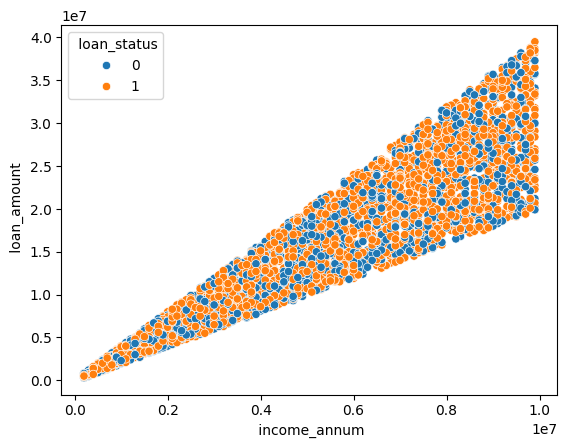

In [20]:
sns.scatterplot(x=" income_annum",y=" loan_amount",data=df,hue=" loan_status")

## Logistic Regression

In [21]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [22]:
lg.score(x_test,y_test)

0.9250585480093677

In [23]:
lg.predict([[0.295621,-1.004461,-1.007288,-1.018747,-0.755720,1.243677,-1.658464,-0.979969,-0.928153,-1.024566,-0.915960]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
y_test.at[3485]

0

## Decision Tree

In [25]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
dt.score(x_test,y_test)

0.9672131147540983

In [27]:
dt.predict([[0.295621,0.995559,0.992765,-0.270487,0.162188,-0.157737,-0.167833,-0.272590,-0.290115,-0.255563,0.253341]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
y_test.at[3281]

1

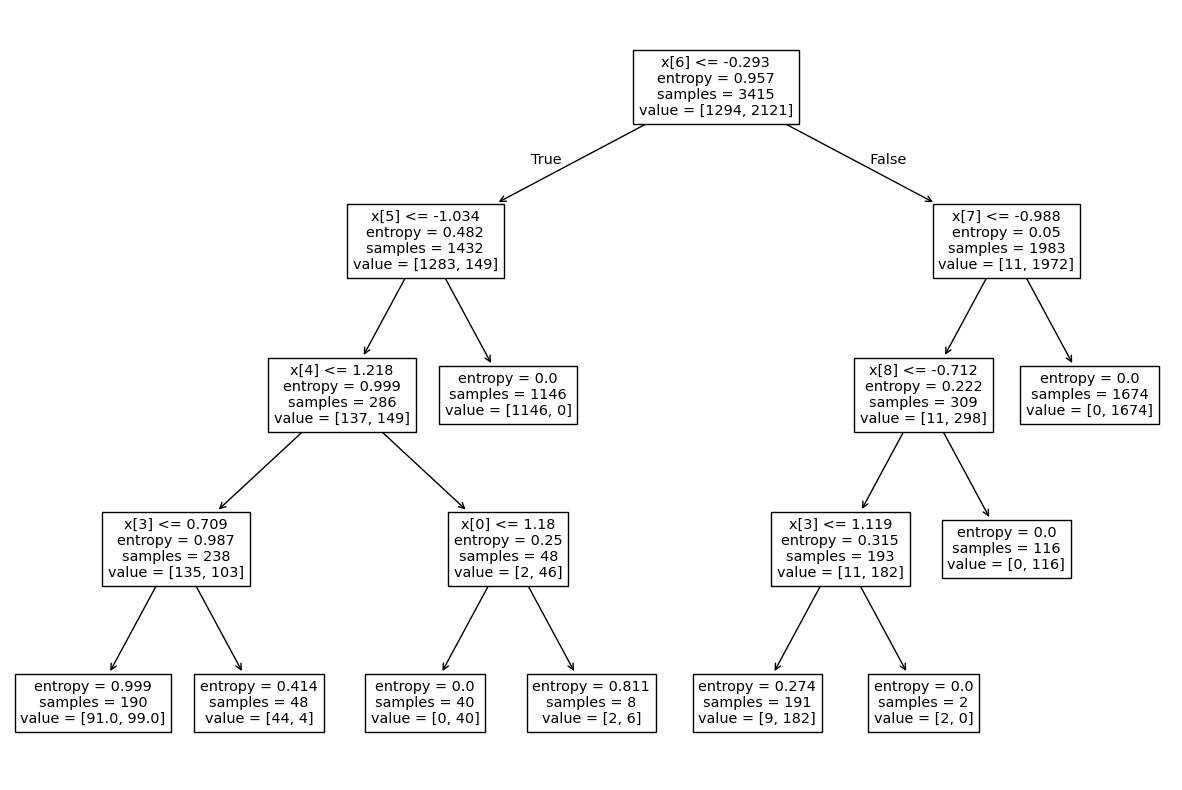

In [29]:
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.show()

In [30]:
for i in range(2,21):
    d=DecisionTreeClassifier(max_depth=i)
    d.fit(x_train,y_train)
    print(f"Iteration: {i}, Training accuracy: {d.score(x_train,y_train)},Test accuracy: {d.score(x_test,y_test)}")

Iteration: 2, Training accuracy: 0.9566617862371889,Test accuracy: 0.9613583138173302
Iteration: 3, Training accuracy: 0.9666178623718887,Test accuracy: 0.9543325526932084
Iteration: 4, Training accuracy: 0.9692532942898975,Test accuracy: 0.9660421545667447
Iteration: 5, Training accuracy: 0.9765739385065886,Test accuracy: 0.9637002341920374
Iteration: 6, Training accuracy: 0.9803806734992679,Test accuracy: 0.968384074941452
Iteration: 7, Training accuracy: 0.9847730600292826,Test accuracy: 0.9707259953161592
Iteration: 8, Training accuracy: 0.9923865300146413,Test accuracy: 0.9765807962529274
Iteration: 9, Training accuracy: 0.9935578330893119,Test accuracy: 0.9765807962529274
Iteration: 10, Training accuracy: 0.9961932650073206,Test accuracy: 0.9765807962529274
Iteration: 11, Training accuracy: 0.9985358711566618,Test accuracy: 0.9718969555035128
Iteration: 12, Training accuracy: 0.9997071742313324,Test accuracy: 0.9730679156908665
Iteration: 13, Training accuracy: 1.0,Test accuracy:

## Support Vector Machine

In [31]:
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
sv.score(x_test,y_test)

0.936768149882904

In [33]:
sv.predict([[0.295621,-1.004461,-1.007288,-1.018747,-0.755720,1.243677,-1.658464,-0.979969,-0.928153,-1.024566,-0.915960]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
y_test.at[3485]

0

## K-Nearest Neighbors

In [35]:
kn=KNeighborsClassifier(n_neighbors=9)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [36]:
kn.score(x_test,y_test)

0.9168618266978923

In [37]:
kn.predict([[-1.473548,-1.004461,0.992765,-1.018747,-0.844193,-0.157737,-0.597042,-0.795435,-0.654708,-1.035552,-0.977503]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [38]:
y_test.at[1790]

0

In [39]:
for i in range(2,21):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,y_train)
    print(f"Iteration: {i}, Training accuracy: {k.score(x_train,y_train)},Test accuracy: {k.score(x_test,y_test)}")

Iteration: 2, Training accuracy: 0.9367496339677892,Test accuracy: 0.8688524590163934
Iteration: 3, Training accuracy: 0.9496339677891654,Test accuracy: 0.8992974238875878
Iteration: 4, Training accuracy: 0.9367496339677892,Test accuracy: 0.8852459016393442
Iteration: 5, Training accuracy: 0.9385065885797951,Test accuracy: 0.9063231850117096
Iteration: 6, Training accuracy: 0.927086383601757,Test accuracy: 0.9016393442622951
Iteration: 7, Training accuracy: 0.9285505124450951,Test accuracy: 0.9074941451990632
Iteration: 8, Training accuracy: 0.9194729136163983,Test accuracy: 0.9086651053864169
Iteration: 9, Training accuracy: 0.9235724743777453,Test accuracy: 0.9168618266978923
Iteration: 10, Training accuracy: 0.9250366032210835,Test accuracy: 0.9074941451990632
Iteration: 11, Training accuracy: 0.9247437774524158,Test accuracy: 0.9168618266978923
Iteration: 12, Training accuracy: 0.9235724743777453,Test accuracy: 0.9133489461358314
Iteration: 13, Training accuracy: 0.9244509516837481

## Random Forest

In [40]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rf.score(x_test,y_test)

0.977751756440281

In [42]:
rf.predict([[-0.294102,0.995559,0.992765,1.226033,1.843175,-0.858444,0.661585,1.465103,-0.928153,1.260473,0.191798]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
y_test.at[1069]

1

In [44]:
cm=confusion_matrix(y_test,rf.predict(x_test))
cm

array([[311,   8],
       [ 11, 524]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

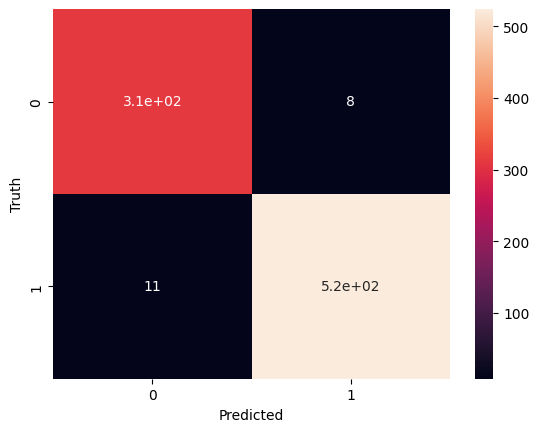

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [46]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       319
           1       0.98      0.98      0.98       535

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## Naive Bayes (Here, we utilize a Gaussian Naive Bayes Classifier)

In [47]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [48]:
gb.score(x_test,y_test)

0.9391100702576113

In [49]:
gb.predict([[-1.473548,0.995559,0.992765,-0.769327,-0.877370,0.893324,-1.554061,-0.595524,0.165627,-0.826822,-0.423623]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
y_test.at[3798]

0

## Voting

In [51]:
vt_hard=VotingClassifier(estimators=[("LogisticReg",LogisticRegression()),("SVM",SVC()),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())],voting="hard")
vt_hard.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticReg', LogisticRegression()),
                             ('SVM', SVC()), ('KNN', KNeighborsClassifier()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('RandomForest', RandomForestClassifier())])

In [52]:
vt_hard.score(x_test,y_test)

0.955503512880562

In [53]:
for m in vt_hard.estimators_:
    print(m.score(x_test,y_test))

0.9250585480093677
0.9426229508196722
0.9063231850117096
0.9707259953161592
0.9391100702576113
0.9718969555035128


In [54]:
vt_hard.transform(x_test)

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1],
       ...,
       [1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [55]:
vt_soft=VotingClassifier(estimators=[("LogisticReg",LogisticRegression()),("SVM",SVC(probability=True)),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())],voting="soft")
vt_soft.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticReg', LogisticRegression()),
                             ('SVM', SVC(probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('RandomForest', RandomForestClassifier())],
                 voting='soft')

In [56]:
for n in vt_soft.estimators_:
    print(n.score(x_test,y_test))

0.9250585480093677
0.9426229508196722
0.9063231850117096
0.9718969555035128
0.9391100702576113
0.9754098360655737


In [57]:
vt_soft.transform(x_test)

array([[0.99743766, 0.00256234, 0.9999441 , ..., 0.02064214, 0.97      ,
        0.03      ],
       [0.15609464, 0.84390536, 0.10941531, ..., 0.6958476 , 0.05      ,
        0.95      ],
       [0.9395931 , 0.0604069 , 0.74138322, ..., 0.04645296, 0.4       ,
        0.6       ],
       ...,
       [0.23809674, 0.76190326, 0.43001169, ..., 0.67272706, 0.04      ,
        0.96      ],
       [0.01617895, 0.98382105, 0.00612276, ..., 0.98764727, 0.01      ,
        0.99      ],
       [0.95107943, 0.04892057, 0.99883349, ..., 0.03216092, 0.98      ,
        0.02      ]])

In [58]:
vt_soft.score(x_test,y_test)

0.9648711943793911

## Bagging

In [59]:
bg=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100),n_estimators=10)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier())

In [60]:
bg.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [61]:
bg.score(x_test,y_test)

0.977751756440281

## Stacking

In [62]:
st=StackingClassifier(estimators=[("SVM",SVC()),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())],final_estimator=LogisticRegression())
st.fit(x_train,y_train)

StackingClassifier(estimators=[('SVM', SVC()), ('KNN', KNeighborsClassifier()),
                               ('DecisionTree', DecisionTreeClassifier()),
                               ('NaiveBayes', GaussianNB()),
                               ('RandomForest', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [63]:
st.predict_proba(x_test)

array([[0.99784485, 0.00215515],
       [0.00978587, 0.99021413],
       [0.23714608, 0.76285392],
       ...,
       [0.01555882, 0.98444118],
       [0.00588819, 0.99411181],
       [0.99666708, 0.00333292]])

In [64]:
st.score(x_test,y_test)

0.9742388758782201

## Displaying all model predictions in the form of a DataFrame

In [65]:
All_model_prediction=pd.DataFrame({
    "Logistic_Regression":lg.predict(x_test),"KNN":kn.predict(x_test),"SVM":sv.predict(x_test),
    "DecisionTree":dt.predict(x_test),"NaiveBayes":gb.predict(x_test),"RandomForest":rf.predict(x_test),
    "Voting_Hard":vt_hard.predict(x_test),"Voting_Soft":vt_soft.predict(x_test),
    "Bagging":bg.predict(x_test),"Stacking":st.predict(x_test)
})
All_model_prediction

,Logistic_Regression,KNN,SVM,DecisionTree,NaiveBayes,RandomForest,Voting_Hard,Voting_Soft,Bagging,Stacking
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,1,1,1
2,0,0,0,1,0,1,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
849,1,1,1,1,1,1,1,1,1,1
850,0,0,0,0,0,0,0,0,0,0
851,1,0,1,1,1,1,1,1,1,1
852,1,1,1,1,1,1,1,1,1,1


In [66]:
import pickle

In [67]:
pickle.dump(rf,open("loan.pkl","wb"))